In [11]:
# NON-EDITABLE CODE CELL
# You may run this cell, but do not edit it.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Problem 1: Association Rules

## 1.1

Read the file sample order basket.csv into a Pandas DataFrame called df.

In [12]:
# CODE CELL

# CODE START
df = pd.read_csv("sample order basket.csv")
# CODE END

df

,OrderNum,Product
0,1000,eggs
1,1001,bread
2,1002,eggs
3,1002,bread
4,1002,flour
...,...,...
1068,1496,bread
1069,1497,jam
1070,1498,bread
1071,1499,eggs


## 1.2


1.2
Create a "binary table" using a Pandas DataFrame. Save the DataFrame in a variable called binary_table.

The specifications of the binary table are as follows:

1. The data in the binary table is based on the order log contained in df.
2. The index values of the binary table are the unique order IDs contained in the sales logs. These are arranged in ascending numerical order. Format the values as int64.
3. The column values of the binary table are the unique products contained in the sales logs. These are arranged in alphabetical order. Format the values as object.
4. The values of the binary table are either 0 or 1. A value will be 1 if the respective product is present in the respective order, and it will be 0 if the respective product is not present in the respective order. So, for example: if Order 5 ordered an apple, then the cell at row 5, column apple will have the value 1, and every other cell at row 5 will have the value 0.

In [13]:
# CODE CELL


temp = []

for idnum in df["OrderNum"]:
    temp.append( {"OrderNum": idnum, "mixed_products" : str(set(df[df["OrderNum"] == idnum]["Product"]))})
binary_table = pd.DataFrame(temp)


def ToNum(x):
    if x == True:
        return 1
    else:
        return 0

binary_table["bread"] = binary_table["mixed_products"].str.contains("bread").apply(ToNum)
binary_table["cheese"] = binary_table["mixed_products"].str.contains("cheese").apply(ToNum)
binary_table["eggs"] = binary_table["mixed_products"].str.contains("eggs").apply(ToNum)
binary_table["flour"] = binary_table["mixed_products"].str.contains("flour").apply(ToNum)
binary_table["jam"] = binary_table["mixed_products"].str.contains("jam").apply(ToNum)
binary_table = binary_table.drop(["mixed_products"], axis=1)
binary_table.set_index("OrderNum", inplace = True)
binary_table






# CODE END

,bread,cheese,eggs,flour,jam
OrderNum,,,,,
1000,0,0,1,0,0
1001,1,0,0,0,0
1002,1,0,1,1,0
1002,1,0,1,1,0
1002,1,0,1,1,0
...,...,...,...,...,...
1496,1,1,1,0,0
1497,0,0,0,0,1
1498,1,0,0,0,0


# 1.3

Using binary_table, create a report. Store this report in a Pandas DataFrame called report.

The specifications of the report are as follows:

1. The data in the report is based on the data in binary_table.
2. The index values of report are simply the defaults (i.e., counting up from 0 to whatever number).                              3. report has two columns: combination and count. The combination column will contain tuples that describe an order combination (e.g., ("apple", "eggplant")). Format the combination column as object. The count column will contain an integer value describing the number of times that this combination appeared in the list of orders. Format the count column as int64.
4. Sort reports by count in descending order. The order of combinations within each count bracket does not matter.

You may use any standard library from Python 3.8 that you feel is necessary to complete this item. (This just means that you can use any standard Python library as long as it was in Python 3.8).



In [15]:
# CODE CELL



# CODE START
report1 = binary_table.copy()

def combination_maker(x):
    temp = []
    if x["bread"] == 1:
        temp.append("bread")
    if x["cheese"] == 1:
        temp.append("cheese")
    if x["eggs"] == 1:
        temp.append("eggs")
    if x["flour"] == 1:
        temp.append("flour")
    if x["jam"] == 1:
        temp.append("jam")
    return tuple(temp)

report1["combination"] = report1.apply(combination_maker, axis=1)
report = pd.DataFrame(report1["combination"])
report.reset_index(inplace=True)
report = report.drop_duplicates(subset = "OrderNum", keep="first")
report.set_index("OrderNum", inplace = True)
report = pd.DataFrame(report.value_counts())
report.columns = ['count']
report.reset_index(inplace=True)
report
# CODE END

,combination,count
0,"(bread,)",65
1,"(bread, jam)",57
2,"(bread, eggs)",47
3,"(bread, eggs, jam)",46
4,"(eggs,)",31
5,"(jam,)",26
6,"(bread, eggs, flour)",21
7,"(bread, flour, jam)",18
8,"(eggs, jam)",17
9,"(bread, cheese, eggs)",17


# Problem 2: A Plot of the International Space Station's Location

## 2.1

Use the requests library and the time library to collect position data of the ISS at intervals of 10 seconds over the course of 30 minutes by sending GET requests to the ISS API endpoint.

The specifications of this problem are as follows:

1. Send a GET request to the ISS API endpoint once every 10 seconds for 30 minutes.
2. Each time you send a GET request, append the returned data to a list called iss_data.
3. Save all the data to a file called iss-data.json so that you do not lose it. You may do this every time you get a request if you wish.
4. Do not modify the returned data per GET request.
5. The final file iss-data.json should contain roughly 180 data points.
We will not be strict about the time intervals. We will only look at the chart that you produce from your data.

In [18]:
import requests
import time
import json

iss_data = []

startpoint = time.time()
while time.time() - startpoint < 1800:
    r = requests.get(url = "http://api.open-notify.org/iss-now.json")
    iss_data.append(r.json())
    with open("iss-data.json", "w") as jsondata:
        json.dump(iss_data, jsondata)
    print(len(iss_data))
    time.sleep(10)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


## 2.2

Using the data you gathered and stored in iss-data.json, make a matplotlib plot of the location data.

The specifications of this problem are as follows:

1. Use the longitude and latitude data contained in iss-data.json as your data.
2. Plot this data on a matplotlib plot that appropriately visualizes the data. It is up to you what specific plot you want to use as long as we, the human readers of your report, understand the message of your plot.
3. Use latitude as the X axis and longitude as the Y axis.
4. VERY IMPORTANT: Make sure that the chart displays in your Jupyter notebook before you submit.
We will only check the chart. We do not care how you make it display as long as you follow the specifications.

Text(0, 0.5, 'Longitude')

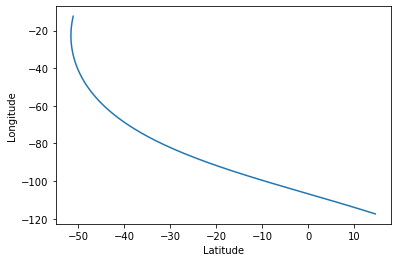

In [19]:
import json
# CODE START
%matplotlib inline

with open("iss-data.json", "r") as jsonfile:
    jsondata = json.loads(jsonfile.read())
# df_iss = pd.DataFrame(jsondata)
df_iss = pd.DataFrame(pd.DataFrame(jsondata)['iss_position'].values.tolist())
df_iss = df_iss.astype('float') 

fig, ax = plt.subplots() 
ax.plot(df_iss["latitude"], df_iss["longitude"])
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")